## Übung zur Klassifikation - Onlinekäufe
Das Ziel dieser Übung ist die Vorhersage eines Onlinekaufs aus 400 Beobachtungen mit jeweils drei Attributen

#### 1. Lesen Sie die Datei  `OnlinePurchase.csv` aus dem Unterordener `/data`in ein DataFrame ein

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('../data/OnlinePurchase.csv',sep=',', 
                 delimiter=None, header='infer', names=None, index_col=0, usecols=None)
df.head()

,Gender,Age,EstimatedSalary,Purchased
User ID,,,,
15624510,Male,19,19000,0
15810944,Male,35,20000,0
15668575,Female,26,43000,0
15603246,Female,27,57000,0
15804002,Male,19,76000,0


In [3]:
df.shape

(400, 4)

#### 2. Kodieren Sie die nicht-numerische Spalte 'Gender'
> Hinweise: </br>
> * Um einen Spaltenvektor aus einem DataFrame zu erhalten kann `df.iloc[:,columnPosition]...` oder `df.loc[:,'columnName'] = ...` verwendet werden
> * Umkodieren mit `sklearn` gelingt mit dem `LabelEncoder` aus dem `preprocessing` Modul

In [4]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
encoded_sex = encode.fit_transform(df.iloc[:, 0])
#encoded_sex = encode.fit_transform(df.loc[:, 'Gender'])
print(encoded_sex)

[1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0
 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0
 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 0
 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0
 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0
 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1
 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0
 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 0 0
 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 1
 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0
 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 1 0 1 0]


In [5]:
df['Gender'] = encoded_sex

In [6]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
User ID,,,,
15624510,1,19,19000,0
15810944,1,35,20000,0
15668575,0,26,43000,0
15603246,0,27,57000,0
15804002,1,19,76000,0


#### 3. Trainieren Sie einen Entscheidungsbaum mit dem Gini-Index bis zu einer maximalen Tiefe von 3
> Hinweise: <br>
> a. Der binäre Label-Vektor $y$ ist gegeben durch die Spalte `Purchased`. Der Rest des DataFrames beinhaltet die *feature matrix* $y$ <br>
> b. Um einen Datensatz mit den relevanten Features/Splaten zu erhalten kann `df_a = df.loc[:,['r1','r2',...,'rn']]` verwendet weren.<br>

In [7]:
y = df['Purchased']
y.unique()

array([0, 1])

In [8]:
X = df.loc[:,['Gender', 'Age', 'EstimatedSalary']]
X.head()

,Gender,Age,EstimatedSalary
User ID,,,
15624510,1,19,19000
15810944,1,35,20000
15668575,0,26,43000
15603246,0,27,57000
15804002,1,19,76000


In [9]:
X.columns

Index(['Gender', 'Age', 'EstimatedSalary'], dtype='object')

In [10]:
dtree = DecisionTreeClassifier(criterion='gini',max_depth = 3)
dtree.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#### 4. Wie genau ist die Vorhersage und welche Features tragen gar nichts zu den zu treffenden Entscheidungen bei?
> Hinweis: Hierzu sollte man einen Blick in die [Dokumentation zum `DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) werfen.

In [11]:
"The accuracy of the model is {0:.3f}".format(dtree.score(X,y))

'The accuracy of the model is 0.915'

In [12]:
# dtree.feature_importances_
fi = dtree.feature_importances_*100
fi = fi.round(2)
# present the results in zipped form -> interpretability
print(dict(zip(X.columns, fi)))

{'Gender': 0.0, 'Age': 60.47, 'EstimatedSalary': 39.53}


Somit leistet das Feature `Gender` keinerlei Beitrag zu den Entscheidungen!

#### 5. Visualisieren Sie den sich ergebenden Entscheidungsbaum

Wir versuchen es erst mit dem Standard:

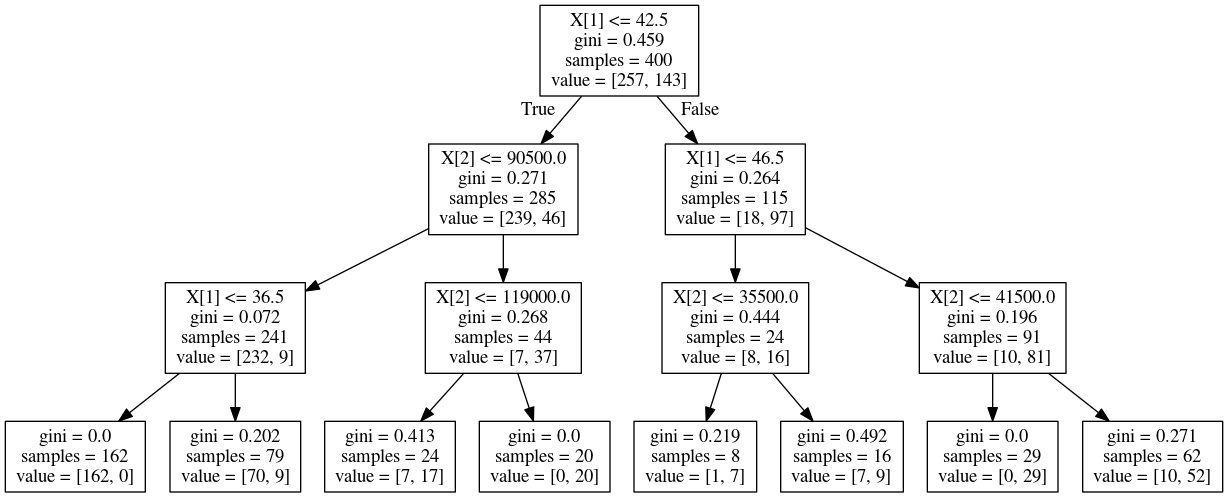

In [18]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Durch Anpassung einiger Parameter können wir das Ergebnis sowohl visuell aufwerten, als auch die Interpretation einfacher gestalten:

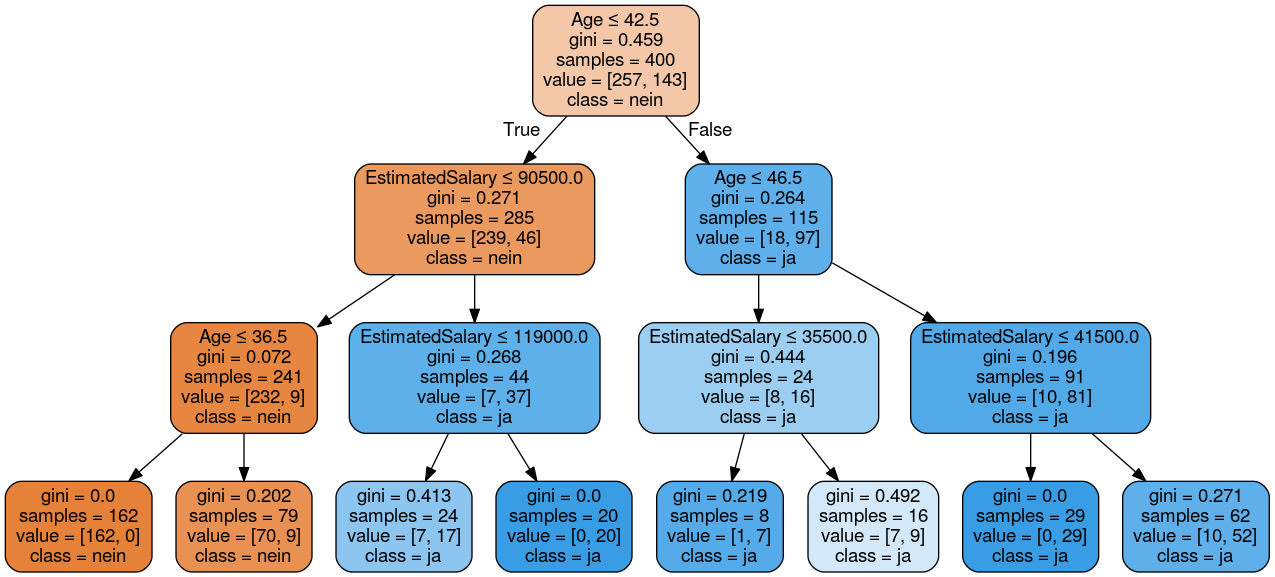

In [17]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
#export_graphviz(dtree, out_file=dot_data) 
export_graphviz(dtree, out_file=dot_data,
                feature_names = X.columns,
                class_names = ['no','yes'],
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#### 6. Interpretieren Sie das Ergebnis (zumindest teilweise). Was macht einen Käufer aus?

Die Wahrscheinlichkeit eines Kaufs ist wesentlich höher für Personen älter 42,5 Jahren. Unter dieser Altersgrenze steigt die Wahrscheinlichkeit erneut für die größte Gehaltsgruppe.